In [30]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [31]:
%%timeit
random_list = []
for i in range(10000):
    random_list.append(random.randint(10,20))

9.28 ms ± 322 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%%timeit
random_int = np.random.randint(10,20, size=10000)

134 µs ± 752 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [33]:
#numpy allows to generate numbers 
random_array = np.random.rand(10,1)
random_array

array([[0.92571501],
       [0.39661122],
       [0.25935184],
       [0.41088371],
       [0.03750066],
       [0.22880183],
       [0.33316667],
       [0.05776961],
       [0.10166744],
       [0.30874765]])

In [34]:
#numpy allows to generate numbers 
random_int = np.random.randint(1,10, size=30)
random_int

array([8, 7, 5, 3, 6, 7, 3, 9, 7, 2, 1, 9, 2, 7, 4, 7, 2, 4, 1, 4, 8, 2,
       2, 6, 6, 8, 5, 8, 4, 9])

#### Как сгенерировать людей из разных городов, чтобы выборка была похожа на реальность.

In [36]:
cities = {'Moscow':20000, 'Piter':8000, 'Voronezh': 1000}
map_cities = {i : city for i, city in enumerate(cities.keys())}
sum_population = sum(i for i in cities.values())
citi_probabilities = [i/sum_population for i in cities.values()]


In [37]:
map_cities

{0: 'Moscow', 1: 'Piter', 2: 'Voronezh'}

In [41]:
realistic_probas = np.random.choice(np.arange(3), size=1000, p=citi_probabilities)
pd.Series(realistic_probas).map(map_cities).value_counts()


Moscow      683
Piter       282
Voronezh     35
dtype: int64

#### Как сделать интересные числовые распределения.  Пример с распределением звонков.

In [39]:
first_part = np.random.normal(loc=10, scale=2.5, size=1000)
second_part = np.random.normal(loc=18, scale=2.5, size=800)
third_part = np.random.uniform(size=500, high=24)
all_together = np.concatenate([first_part, second_part, third_part])
all_together = all_together[(all_together<24) & (all_together >=0)]
np.random.shuffle(all_together)

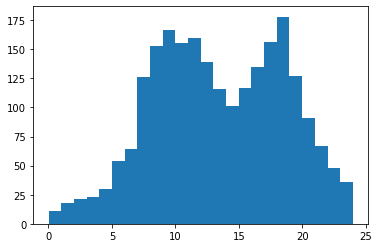

In [40]:
plt.hist(all_together, bins=24);

У Numpy есть еще множество распределений, не стесняйтесь использовать их.

Советы:
1) Не обязательно всю таблицу генерить за один раз. Можно сгенерить сначала какие-то обязательные тарифы, а потом случайно докинуть доп услуги.


2) Подумайте какие поля зависят между собой. Соответственно, что вам прощe сгенерить вначале, а что потом с некоторой зависимостью от уже сгенеренных полей. Можно сгенерить скелет одной таблицы, потом на основе ее заполнить другую, а потом вернуться и уже окончательно доделать первую.

3) не забывайте гуглить. многие распределения сначала можно найти, а потом постепенно подгонять.

4) Первую итерацию лучше сделать пораньше, чтобы не задерживать остальные вещи. Т.к. набор полей фиксированный, то после улучшения генерации, можно будет подменить файл.